In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.applications.efficientnet import EfficientNetB0


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
(train_data,test_data), info_feature = tfds.load("food101",
                                                 split = ["train","validation"],
                                                 shuffle_files = True,
                                                 as_supervised = True,
                                                 with_info = True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incompleteG927RC/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incompleteG927RC/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


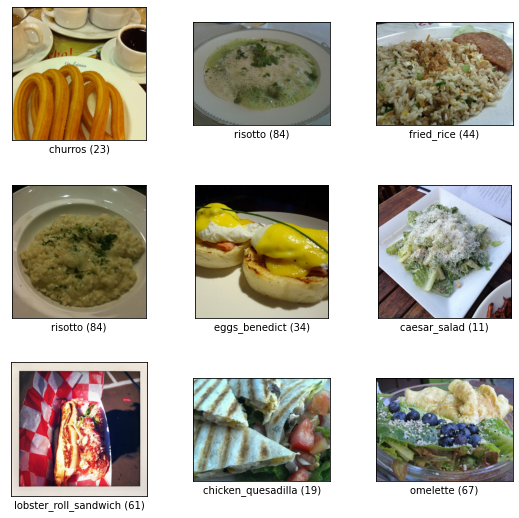

In [ ]:
fig = tfds.show_examples(train_data, info_feature)

In [ ]:
info_feature.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
print(f'shape = {info_feature.features["image"].shape}')
print(f'datatype = {info_feature.features.dtype}')

shape = (None, None, 3)
datatype = {'image': tf.uint8, 'label': tf.int64}


In [ ]:
class_name = info_feature.features["label"].names
class_name[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
one_sample = train_data.take(1)

for image , label in one_sample:
  print(f"""
    shape = {image.shape}
    datatype = {image.dtype}
    label(int) = {label}
    lable(str) = {class_name[label.numpy()]}
  """)


    shape = (512, 512, 3)
    datatype = <dtype: 'uint8'>
    label(int) = 49
    lable(str) = grilled_cheese_sandwich
  


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[239, 217, 157],
        [244, 222, 162],
        [247, 227, 168],
        ...,
        [119, 104,  73],
        [111,  95,  70],
        [105,  89,  66]],

       [[233, 212, 149],
        [239, 218, 155],
        [243, 223, 162],
        ...,
        [117, 102,  71],
        [108,  92,  67],
        [101,  85,  62]],

       [[227, 206, 139],
        [234, 213, 146],
        [238, 219, 153],
        ...,
        [117, 100,  70],
        [108,  91,  65],
        [101,  83,  59]],

       ...,

       [[ 35,   7,  19],
        [ 35,   7,  19],
        [ 36,   8,  20],
        ...,
        [198, 181, 127],
        [196, 179, 125],
        [193, 176, 122]],

       [[ 34,   6,  18],
        [ 34,   6,  18],
        [ 35,   7,  19],
        ...,
        [200, 183, 129],
        [201, 184, 130],
        [198, 181, 127]],

       [[ 33,   5,  17],
        [ 34,   6,  18],
        [ 35,   7,  19],
        ...,
        [203, 186, 13

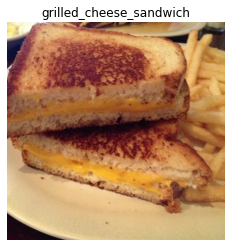

In [ ]:
# img = mpimg.imread(image)
fig = plt.imshow(image)
plt.title(class_name[label.numpy()])
plt.axis("off");

In [ ]:
from locale import normalize
from tensorflow._api.v2.dtypes import float32
def normalize_img(image, label, shape = (224,224)):
  image = tf.image.resize(image, shape)
  return tf.cast(image , tf.float32), label


train_data = train_data.map(
    normalize_img,
    num_parallel_calls = tf.data.AUTOTUNE
)

train_data = train_data.shuffle(1000)
train_data = train_data.batch(64)
train_data = train_data.prefetch(tf.data.AUTOTUNE)  

test_data = test_data.map(
    normalize_img,
    num_parallel_calls=tf.data.AUTOTUNE

)

test_data = test_data.shuffle(1000)
test_data= test_data.batch(64)
test_data = test_data.prefetch(tf.data.AUTOTUNE)



In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
inputs = keras.Input(shape = (224,224,3), name = "input_layer")

x = layers.Conv2D(101,10,activation="relu")(inputs)
x = layers.Conv2D(50,10, activation = "relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(50,10, activation = "relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(50,10, activation = "relu")(x)
x = layers.MaxPool2D(2)(x)

x = layers.Flatten()(x)

output = layers.Dense(101, activation = "softmax")(x)

model_0 = keras.Model(inputs, output)

model_0.compile(optimizer ='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

history_0 = model_0.fit(train_data, epochs = 5,steps_per_epoch = len(train_data) , validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
1184/1184 [==============================] - 1497s 1s/step - loss: 5.2398 - accuracy: 0.0093 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 2/5
1184/1184 [==============================] - 1498s 1s/step - loss: 4.5821 - accuracy: 0.0180 - val_loss: 4.6180 - val_accuracy: 0.0099
Epoch 3/5
1184/1184 [==============================] - 1493s 1s/step - loss: 4.6171 - accuracy: 0.0091 - val_loss: 4.6155 - val_accuracy: 0.0099
Epoch 4/5
1184/1184 [==============================] - 1494s 1s/step - loss: 4.6159 - accuracy: 0.0093 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 5/5
1184/1184 [==============================] - 1494s 1s/step - loss: 4.6172 - accuracy: 0.0091 - val_loss: 4.6159 - val_accuracy: 0.0099


In [ ]:
base_model = EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = keras.Input(shape = (224,224,3), name = "input_layer")

x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

outputs = layers.Dense(101, activation = "softmax" , name = "output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data, epochs = 5,steps_per_epoch = len(train_data) , validation_data = test_data, validation_steps = len(test_data))

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
1184/1184 [==============================] - 221s 178ms/step - loss: 1.8974 - accuracy: 0.5497 - val_loss: 1.1959 - val_accuracy: 0.6882
Epoch 2/5
1184/1184 [==============================] - 212s 177ms/step - loss: 1.3238 - accuracy: 0.6609 - val_loss: 1.0697 - val_accuracy: 0.7137
Epoch 3/5
1184/1184 [==============================] - 212s 177ms/step - loss: 1.1832 - accuracy: 0.6925 - val_loss: 1.0167 - val_accuracy: 0.7276
Epoch 4/5
1184/1184 [==============================] - 209s 175ms/step - loss: 1.0961 - accuracy: 0.7133 - val_loss: 0.9893 - val_accuracy: 0.7332
Epoch 5/5
1184/1184 [==============================] - 211s 176ms/step - loss: 1.0314 - accuracy: 0.7300 - val_loss: 0.9769 - val_accuracy: 0.7339


In [ ]:
base_model = EfficientNetB0(include_top = False)
base_model.trainable = True

for layers in base_model.layers[:-10]:
  base_model.trainable = False

input = keras.Input(shape = (224,224,3), name = "input_layer")


x = base_model(input)
x = keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)

outputs = keras.layers.Dense(101, activation = "softmax" , name = "output_layer")(x)

model_2 = keras.Model(input, outputs)

model_2.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)

)


Epoch 1/10
1184/1184 [==============================] - 217s 176ms/step - loss: 1.8948 - accuracy: 0.5506 - val_loss: 1.1993 - val_accuracy: 0.6864
Epoch 2/10
1184/1184 [==============================] - 210s 175ms/step - loss: 1.3222 - accuracy: 0.6613 - val_loss: 1.0708 - val_accuracy: 0.7143
Epoch 3/10
1184/1184 [==============================] - 207s 173ms/step - loss: 1.1807 - accuracy: 0.6943 - val_loss: 1.0201 - val_accuracy: 0.7249
Epoch 4/10
1184/1184 [==============================] - 207s 173ms/step - loss: 1.0959 - accuracy: 0.7140 - val_loss: 0.9913 - val_accuracy: 0.7322
Epoch 5/10
1184/1184 [==============================] - 207s 173ms/step - loss: 1.0288 - accuracy: 0.7294 - val_loss: 0.9719 - val_accuracy: 0.7359
Epoch 6/10
1184/1184 [==============================] - 206s 172ms/step - loss: 0.9788 - accuracy: 0.7416 - val_loss: 0.9604 - val_accuracy: 0.7341
Epoch 7/10
1184/1184 [==============================] - 205s 172ms/step - loss: 0.9365 - accuracy: 0.7537 - val_